<h1 style="text-align:center">Travail pratique numérique en thermodynamique statistique</h1>
<h2 style="text-align:center">PARTIE 1 : Cinétique des gaz parfaits</h2>

Veuillez indiquer le nom des membres de votre équipe dans la cellule suivante.

# Introduction #
Ce travail révise d'abord quelques bases générales de mécanique statistique classique avec le script `tds2Danimation_hXX.py` qui simule la théorie cinétique des gaz parfaits en 2D. Cette simulation utilise le concept de sphères dures, mais ici pour le cas des particules d'un gaz afin d'introduire des collisions élastiques entre elles sur leur trajectoire ballistique. Notez qu'une sphère est colorée et grossie seulement pour l’effet visuel dans l'animation, la physique de l’algorithme codé considère bien des particules totalement identiques. Les questions sur cette simulation, à répondre directement dans les cellules du carnet _(Notebook)_ ici-même, explorent quelques paramètres de la thermodynamique statistique et introduisent de nouveaux termes utiles à l'étude du mouvement des électrons dans la matière.

_N.B._ 
- _Pour montrer les animations à l'écran, le script `tds2Danimation_hXX.py` importe la librairie `VPython` qu'il faut donc installer. Des liens vers sa documentation et de l'information complémentaire sont donnés dans la médiagraphie à la fin._
- _Le code dans ce script est abusivement commenté dans notre contexte pédagogique, mais il serait bien sûr préférable de s’en tenir aux recommandations du <a href="https://www.python.org/dev/peps/pep-0008"> PEP 8 — Style Guide for Python Code</a>._
- _Notez finalement que la boucle principale à la fin du script laisse l'utilisateur voir l'animation aussi longtemps que souhaité, assurez-vous donc de savoir comment l'interrompre correctement avant de lancer la simulation ou de la remplacer par une boucle `for`._

# 1<sup>re</sup> partie - Cinétique CLASSIQUE des gaz parfaits #

### Simulation 2D ###

In [164]:
%run /Users/felixdesroches/Documents/projet_etat_solide/projet_etat_solide/thermodynamique_statistique/code_fonctionnel.py

### Questions statistiques ###

**I.** _(3 points)_  &mdash; Utilisez la liste finale des vecteurs de quantité de mouvement $\vec{p}$ de toutes les sphères pour calculer la moyenne de son carré $\langle p^2\rangle=\langle\vec{p}\cdot\vec{p}\rangle$ en écrivant le code nécessaire dans la cellule qui suit. 

In [148]:
squared_p_norm=np.average(np.sum(p**2,1))
print(squared_p_norm)

5.600000000000003e-47



**II.** _(2 points)_  &mdash; La température $T$ (macroscopique) est proportionnelle à l'énergie cinétique moyenne $E_{cin}$ de l'ensemble des particules lorsque ce système est rendu à l'équilibre. Celle-ci peut se calculer classiquement selon son <a href="https://fr.wikipedia.org/wiki/%C3%89quipartition_de_l%27%C3%A9nergie">principe d'équipartition</a>, _i.e._ en répartissant l'énergie également sur chaque degré de liberté ici en translation seulement d'où, au total pour $\text{DIM}=1,2\text{ ou } 3$ dimensions d'espace réel,
\begin{equation}
E_{cin}=\frac{\langle p^2 \rangle}{2m}=\text{DIM}\times\frac{1}{2}k_BT
\end{equation}
avec $k_B$, la constante de Boltzmann et $m$, la masse de chaque particule. Quelle est la température du gaz de sphères dures à la fin de la simulation? Est-ce qu'elle a changé significativement par rapport à sa valeur initiale?

In [149]:
T_f = squared_p_norm/(mass*k_B*n_dim)
print(f"La température T={T_f:.4} est conservée à une variation négligeable ({(T_f-T)/T*100:.4}%) près")

La température T=300.0 est conservée à une variation négligeable (5.684e-14%) près


**III.** _(10 points)_ &mdash; Modifiez le code de la simulation pour ajouter une fonction qui suit la trajectoire d'UNE SEULE particule, c'est-à-dire qu'elle doit enregistrer, dans une liste, des valeurs de variables pour cette particule et ce, à chacune de ses collisions avec une autre particule (_i.e._ excluez les collisions avec les parois de la boîte). Les deux variables scalaires à lister sont:
- la distance que la particule a parcouru entre chaque collision,
- le temps écoulé entre ces collisions.

Copiez le code de votre fonction dans la cellule qui suit en y commentant clairement les variables pour ces listes qui devront persister après avoir interrompu l'exécution de la simulation. N'oubliez pas d'inclure votre fichier Python (`.py`) modifié avec la simulation complète lors de la remise.

In [4]:
# def follow_particle(data, particle_index, time, clean=False):
#     if np.all(data[-1,:] == np.array([[0, 0, 0, 0]])):
#         data =  np.expand_dims(np.concatenate((np.array([time]), pos[particle_index])), axis=0)
#     else:
#         data[-1, :] = np.array([time-data[-1, 0], np.sqrt(np.sum((pos[particle_index] - data[-1, 1:])**2)), 0, 0])
#         data =  np.concatenate(
#             (data, np.expand_dims(np.concatenate((np.array([time]), pos[particle_index])), axis=0)),
#             0
#         )
#     if clean:
#         data = data[:-1, :2]
#     return data
# L'objet data, nommé targeted_particle dans le reste du code, est un array (N_intéractions, 4) qui contient les informations
# désirées. Une fois la fonction appelée avec clean=True, le résultat est un array (N_intéractions-1, 2) où les colonnes
# sont respectivement le temps entre les interactions et la distance parcourue entre les interactions.

**IV.** _(2 points)_ &mdash; Calculez le **libre parcours moyen** $l_{moy}$ et le **temps de collision** $\tau$ qui sont les valeurs moyennes des deux listes compilées au numéro précédent.

_(Pour votre information, le libre parcours moyen est de l’ordre de 100 nm dans l'air à température et pression ambiantes, mais_ $l_{moy}$ _peut dépasser 100 000 km dans une enceinte sous vide avec les technologies de pompes modernes!)_



In [179]:
tau = np.average(targeted_particle[:, 0])
lmoy = np.average(np.linalg.norm(targeted_particle[:, 1:], axis=1))
print(f"Le temps de collision est τ={tau:.5f} et le libre parcours moyen est l_moy="+f"{lmoy:.5f}")

Le temps de collision est τ=0.01299 et le libre parcours moyen est l_moy=20.09925


**V.** _(2 points)_ Calculez la vitesse $\vec{v}$ de la particule entre chaque paire de collisions. Quelle est la vitesse moyenne $\langle\vec{v}\rangle$ de la particule?

In [ ]:
v_array = targeted_particle[:, 1:]/np.expand_dims(targeted_particle[:,0], 1)
vmoy = np.average(v_array, axis=0)
print(rf"La vitesse moyenne de la particule entre les collisions est $v_{moy}$={vmoy}")
print("La vitesse de la particule entre chaque paire de collisions est :")
print(v_array)

[[-1173.25133195   177.05681484     0.        ]
 [-1173.25133195   177.05681484     0.        ]
 [-1173.25133195   177.05681484     0.        ]
 [-1173.25133195   177.05681484     0.        ]
 [-1340.83810307  -192.47621211     0.        ]
 [-1340.83810307  -192.47621211     0.        ]
 [-1340.83810307  -192.47621211     0.        ]
 [ 1340.83810307  -192.47621211     0.        ]
 [ 1340.83810307  -192.47621211     0.        ]
 [ 1340.83810307  -192.47621211     0.        ]
 [ 1340.83810307  -192.47621211     0.        ]
 [ 1340.83810307  -192.47621211     0.        ]
 [ 1340.83810307  -192.47621211     0.        ]
 [ 1340.83810307  -192.47621211     0.        ]
 [ 1340.83810307  -192.47621211     0.        ]
 [ 1340.83810307   192.47621211     0.        ]
 [-1340.83810307   192.47621211     0.        ]
 [-1340.83810307   192.47621211     0.        ]
 [ -838.77039396   779.91374389     0.        ]
 [ -838.77039396   779.91374389     0.        ]
 [ -838.77039396   779.91374389     0.  

**VI.** _(5 points)_ &mdash; Pour cette même liste de vitesses, comparez les distributions de la norme $||\vec{v}||$, du carré $v^2$ et d’une de ses composantes $v_x^2$ en étalonnant l’abscisse pour contraster les histogrammes avec une échelle appropriée. Indiquez sur ce graphique la moyenne, le mode, la médiane et la moyenne quadratique des distributions.

286


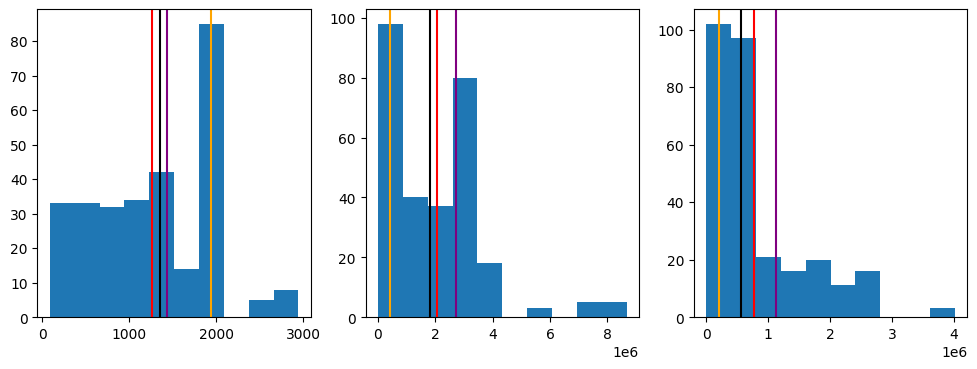

In [180]:
import matplotlib.pyplot as plt
print(len(v_norm))
v_norm = np.linalg.norm(v_array, axis=1)
v_norm_squared = v_norm**2
v_x_squared = v_array[:, 0]**2
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
values, bin_edges = np.histogram(v_norm, bins=10)
axes[0].hist(v_norm, bins=10)
axes[0].axvline(np.mean(v_norm), c="red")
axes[0].axvline(np.median(v_norm), c="black")
axes[0].axvline((bin_edges[np.argmax(values)]+bin_edges[np.argmax(values)+1])/2, c="orange")
axes[0].axvline(np.sqrt(np.mean(v_norm**2)), c="purple")
values, bin_edges = np.histogram(v_norm_squared, bins=10)
axes[1].hist(v_norm_squared, bins=10)
axes[1].axvline(np.mean(v_norm_squared), c="red")
axes[1].axvline(np.median(v_norm_squared), c="black")
axes[1].axvline((bin_edges[np.argmax(values)]+bin_edges[np.argmax(values)+1])/2, c="orange")
axes[1].axvline(np.sqrt(np.mean(v_norm_squared**2)), c="purple")
values, bin_edges = np.histogram(v_x_squared, bins=10)
axes[2].hist(v_x_squared, bins=10)
axes[2].axvline(np.mean(v_x_squared), c="red")
axes[2].axvline(np.median(v_x_squared), c="black")
axes[2].axvline((bin_edges[np.argmax(values)]+bin_edges[np.argmax(values)+1])/2, c="orange")
axes[2].axvline(np.sqrt(np.mean(v_x_squared**2)), c="purple")
plt.show()



**Bonus.** _(4 points)_ &mdash; Montrez que 
- (a) le théorème central limite est satisfait par une des distributions de vitesse du numéro précédent,
- (b) le système simulé est ergodique.

In [ ]:

#

# Médiagraphie #
 - La simulation utilise la librairie <a href="https://vpython.org">VPython</a> conçue pour la visualisation de physique en 3D, avec les instructions d’installation <a href="https://vpython.org/presentation2018/install.html">ici</a> et la documentation <a href="https://www.glowscript.org/docs/VPythonDocs/index.html">ici</a>. Le script fourni qui est exécuté dans ce _Notebook_ adapte en 2D et commente en détail l’exemple <a href="https://www.glowscript.org/#/user/GlowScriptDemos/folder/Examples/program/HardSphereGas-VPython">HardSphereGas-VPython</a> du site interactif <a href="https://www.glowscript.org">GlowScript</a> pour programmer des animations avec VPython directement en ligne.
 
_**N.B. de débogage VPython:** Ayant plus codé en MATLAB qu'en Python jusqu'à maintenant, j'utilise Spyder qui offre une interface similaire, mais j'ai trouvé ce vidéo qui parle d'une <a href="https://www.youtube.com/watch?v=MJiVtz4Uj7M">installation VS code</a> qui peut-être aider? N'hésitez pas à partager de meilleures alternatives que j'ajouterai ici. Vous pouvez aussi tenter l'installation <a href="https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/">directement dans le Notebook</a>, mais au final chaque installation de distribution Python a son lot de <a href="https://xkcd.com/2347/">défis avec les dépendances</a>. Si rien ne fonctionne, n'hésitez pas à contacter la sympathique communauté qui développe et utilise cette librairie VPython d'abord via leur <a href="https://groups.google.com/g/vpython-users">groupe-forum</a>, puis leur <a href="https://github.com/vpython/vpython-jupyter">site GitHub</a> de dépôt de développement. J'ai toujours eu de bonnes expériences d'interaction avec eux!_ 
 